<a href="https://colab.research.google.com/github/Donya-Vafanejad/laptop-price-prediction/blob/master/HOEM_PRICE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
%matplotlib inline

data = pd.read_csv('00 kc_house_data.csv')

In [ ]:
print(data.head(), "\n\n")

           id             date     price  ...     long  sqft_living15  sqft_lot15
0  7129300520  20141013T000000  221900.0  ... -122.257           1340        5650
1  6414100192  20141209T000000  538000.0  ... -122.319           1690        7639
2  5631500400  20150225T000000  180000.0  ... -122.233           2720        8062
3  2487200875  20141209T000000  604000.0  ... -122.393           1360        5000
4  1954400510  20150218T000000  510000.0  ... -122.045           1800        7503

[5 rows x 21 columns] 




In [ ]:
feature_names = ['bedrooms', 'sqft_living']
data_x = data[feature_names]
data_y = data['price']

In [ ]:
print(data_x.head(), "\n\n")

   bedrooms  sqft_living
0         3         1180
1         3         2570
2         2          770
3         4         1960
4         3         1680 




In [ ]:
print(data_y.head(), "\n\n")

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64 




In [ ]:
print('input_shape:', data_x.shape)
print('input_shape:', data_y.shape)

input_shape: (21613, 2)
input_shape: (21613,)


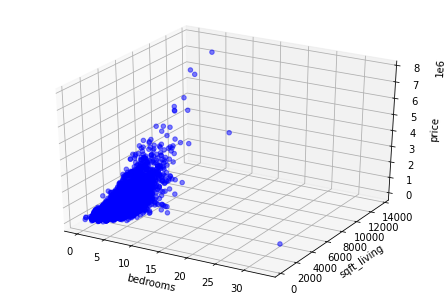

In [ ]:
#plot the data
data_x1 = data['bedrooms']
data_x2 = data['sqft_living']
data_y  = data["price"]

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data_x1, data_x2, data_y, c = "blue", marker = 'o', alpha = 0.5)
ax.set_xlabel('bedrooms')
ax.set_ylabel('sqft_living')
ax.set_zlabel('price')
plt.show()


In [ ]:
#Regression scikit Learn

In [ ]:
from sklearn import linear_model

In [ ]:
linreg = linear_model.LinearRegression()
linreg.fit(data_x, data_y)
print(linreg.intercept_)
print(linreg.coef_)

79281.98395507276
[-57112.89615094    314.15875054]


In [ ]:
#keras

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
print('keras_version:', keras.__version__)

keras_version: 2.6.0


In [ ]:
model = Sequential()
model.add(Dense(1, input_dim =2, kernel_initializer='normal', activation='linear'))

In [ ]:
#Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics =['mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#iteration loop
#convert into arrays
data_x_array = np.array(data_x)
data_y_array = np.array(data_y)
epochs = 1000
hist = model.fit(data_x_array, data_y_array, epochs=epochs, verbose =0 )

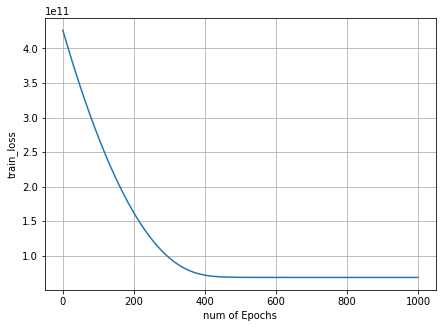

In [ ]:
#visualizing losses
train_loss = hist.history['loss']
xc = range(epochs)
plt.figure(1, figsize =(7,5))

plt.plot(xc, train_loss)
plt.xlabel('num of Epochs')
plt.ylabel('train_loss')
plt.grid(True)
plt.style.use(['ggplot'])

In [ ]:
#model.get-weights()
params = model.layers[0].get_weights()
params

[array([[189.0046 ],
        [262.74023]], dtype=float32), array([236.50923], dtype=float32)]

In [ ]:
from sklearn import preprocessing
features = data[["bedrooms", 'sqft_living', 'price']]
featuresScale = preprocessing.minmax_scale(features)
print(type(featuresScale))
featuresScale[0:5]

<class 'numpy.ndarray'>


array([[0.09090909, 0.06716981, 0.01926557],
       [0.09090909, 0.17207547, 0.06072131],
       [0.06060606, 0.03622642, 0.01377049],
       [0.12121212, 0.12603774, 0.06937705],
       [0.09090909, 0.10490566, 0.05704918]])

In [ ]:
data_x1 = featuresScale[:,0]
data_x2 = featuresScale[:,1]
data_y1 = featuresScale[:,2]

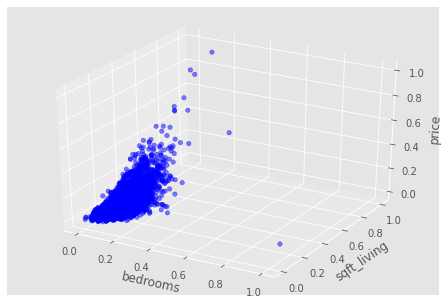

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data_x1, data_x2, data_y1,c='blue', marker ='o', alpha = 0.5)
ax.set_xlabel('bedrooms')
ax.set_ylabel('sqft_living')
ax.set_zlabel('price')
plt.show()

In [ ]:
#reg scikit Learn normalized data
from sklearn import linear_model

predVars = featuresScale[:,0:2]
responseVars = featuresScale[:,2]

linreg = linear_model.LinearRegression()
linreg.fit(predVars, responseVars)
print(linreg.intercept_)
print(linreg.coef_)


0.012509904473743394
[-0.24717712  0.54591521]


In [ ]:
model = Sequential()
model.add(Dense(1, input_dim=2, kernel_initializer='normal', activation='linear'))
#compile model
model.compile(loss = 'mean_squared_error', optimizer ='adam', metrics = ['mse'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [ ]:
epochs = 1000
hist = model.fit(predVars, responseVars, epochs=epochs, verbose=0)

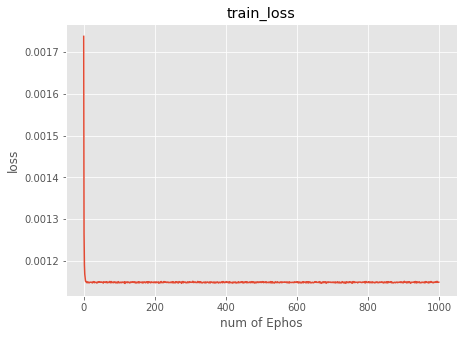

In [ ]:
#visualizing losses
train_loss = hist.history['loss']
xc = range(epochs)
plt.figure(1,figsize=(7,5))
plt.plot(xc, train_loss)

plt.xlabel('num of Ephos')
plt.ylabel('loss')
plt.title('train_loss')
plt.grid(True)
plt.style.use(['ggplot'])

In [ ]:
#model.get_weights()

In [ ]:
params = model.layers[0].get_weights()
params

[array([[-0.24534127],
        [ 0.5488221 ]], dtype=float32), array([0.01154763], dtype=float32)]

In [ ]:
w = params[0]
b = params[1]

print('weight=', w)
print('Bias=', b)

weight= [[-0.24534127]
 [ 0.5488221 ]]
Bias= [0.01154763]


(100, 100)


Text(0.5, 0.92, 'Multivariable Regression model (a=w1*x1+w2*x2=b')

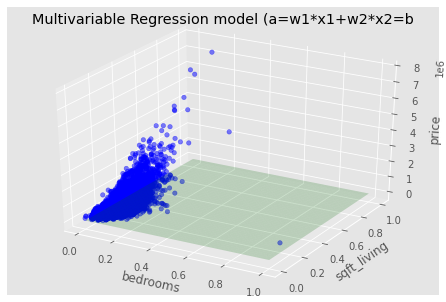

In [ ]:
x1_surf, x2_surf = np.meshgrid(np.linspace(data_x1.min(), data_x1.max(), 100), np.linspace(data_x2.min(), data_x2.max(),100))
Y_predicted_surf = x1_surf*w[0]+x2_surf*w[1]+b
print(Y_predicted_surf.shape)
fig = plt.figure()
ax = Axes3D(fig)

act = ax.scatter(data_x1, data_x2, data_y, c='blue', marker = 'o', alpha = 0.5)
plt_surf = ax.plot_surface(x1_surf, x2_surf, Y_predicted_surf, color ='green', alpha = 0.2)

ax.set_xlabel('bedrooms')
ax.set_ylabel('sqft_living')
ax.set_zlabel('price')
plt.title('Multivariable Regression model (a=w1*x1+w2*x2=b')